In [54]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, \
    average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, \
    plot_confusion_matrix, plot_precision_recall_curve

In [16]:
# https://www.kaggle.com/imnikhilanand/heart-attack-prediction/data?select=data.csv
df = pd.read_csv('data.csv', na_values='?')

In [17]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num       '],
      dtype='object')

In [18]:
df = df.rename(columns={'num       ': 'target'})

In [19]:
df.target.value_counts()

0    188
1    106
Name: target, dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    int64  
 1   sex       294 non-null    int64  
 2   cp        294 non-null    int64  
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       286 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     104 non-null    float64
 11  ca        3 non-null      float64
 12  thal      28 non-null     float64
 13  target    294 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 32.3 KB


In [21]:
df = df.drop(columns=['slope', 'ca', 'thal'], axis=1)  # dropping cols
df = df.dropna().copy()  # dropping rows with nas

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       261 non-null    int64  
 1   sex       261 non-null    int64  
 2   cp        261 non-null    int64  
 3   trestbps  261 non-null    float64
 4   chol      261 non-null    float64
 5   fbs       261 non-null    float64
 6   restecg   261 non-null    float64
 7   thalach   261 non-null    float64
 8   exang     261 non-null    float64
 9   oldpeak   261 non-null    float64
 10  target    261 non-null    int64  
dtypes: float64(7), int64(4)
memory usage: 24.5 KB


The ten features we’ll be using are:

age: age in years
sex: sex (1 = male; 0 = female)
cp: chest pain type
– 1: typical angina
– 2: atypical angina
– 3: non-anginal pain
– 4: asymptomatic
trestbps: resting blood pressure (in mm Hg on admission to the hospital)
chol: serum cholesterol in mg/dl
fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
restecg: resting electrocardiographic results
– 0: normal
– 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
– 2: showing probable or definite left ventricular hypertrophy by Estes’ criteria
thalach: maximum heart rate achieved
exang: exercise-induced angina (1 = yes; 0 = no)
oldpeak: ST depression induced by exercise relative to rest

In [23]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,0
5,32,0,2,105.0,198.0,0.0,0.0,165.0,0.0,0.0,0


In [30]:
print(df['cp'].value_counts(dropna=False))
df['restecg'].value_counts(dropna=False)

4    113
2     92
3     46
1     10
Name: cp, dtype: int64


0.0    208
1.0     47
2.0      6
Name: restecg, dtype: int64

In [31]:
df = pd.get_dummies(df, columns=['cp', 'restecg'], drop_first=True)

In [32]:
df

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_2,cp_3,cp_4,restecg_1.0,restecg_2.0
0,28,1,130.0,132.0,0.0,185.0,0.0,0.0,0,1,0,0,0,1
1,29,1,120.0,243.0,0.0,160.0,0.0,0.0,0,1,0,0,0,0
3,30,0,170.0,237.0,0.0,170.0,0.0,0.0,0,0,0,0,1,0
4,31,0,100.0,219.0,0.0,150.0,0.0,0.0,0,1,0,0,1,0
5,32,0,105.0,198.0,0.0,165.0,0.0,0.0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,160.0,331.0,0.0,94.0,1.0,2.5,1,0,0,1,0,0
290,54,0,130.0,294.0,0.0,100.0,1.0,0.0,1,0,1,0,1,0
291,56,1,155.0,342.0,1.0,150.0,1.0,3.0,1,0,0,1,0,0
292,58,0,180.0,393.0,0.0,110.0,1.0,1.0,1,1,0,0,0,0


In [39]:
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
cat_cols = list(set(df.columns) - set(num_cols) - {'target'})
print('Num Cols',num_cols)
print('cat_cols', cat_cols)

Num Cols ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
cat_cols ['cp_4', 'cp_3', 'restecg_1.0', 'exang', 'fbs', 'restecg_2.0', 'sex', 'cp_2']


In [42]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=24, stratify=df['target'])

print(df_train.shape)
print(df_test.shape)
print()
print(df_train['target'].value_counts(normalize=True))
print()
print(df_test['target'].value_counts(normalize=True))

(208, 14)
(53, 14)

0    0.625
1    0.375
Name: target, dtype: float64

0    0.622642
1    0.377358
Name: target, dtype: float64


In [44]:
scale = StandardScaler()
scale.fit(df_train[num_cols])

StandardScaler()

In [45]:
def get_features_and_target_arrays(df, num_cols, cat_cols, scaler):
    X_numeric_scaled = scaler.transform(df[num_cols])
    X_categorical = df[cat_cols].to_numpy()
    X = np.hstack((X_numeric_scaled, X_categorical))
    y = df['target']
    return X, y

In [48]:
X, y = get_features_and_target_arrays(df_train, num_cols, cat_cols, scale)

In [49]:
clf = LogisticRegression(penalty='none')  # logistic regression with no penalty term in the cost function.

clf.fit(X, y)

LogisticRegression(penalty='none')

In [50]:
X_test, y_test = get_features_and_target_arrays(df_test, num_cols, cat_cols, scale)

/opt/homebrew/Caskroom/miniforge/base/envs/regular/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


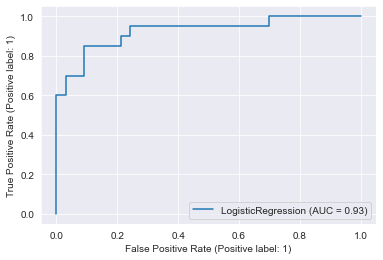

In [53]:
plot_roc_curve(clf, X_test, y_test)

/opt/homebrew/Caskroom/miniforge/base/envs/regular/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


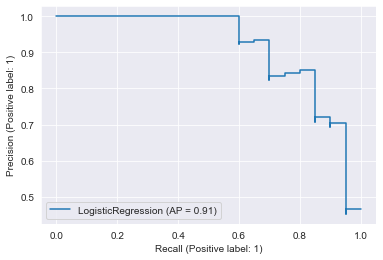

In [55]:
plot_precision_recall_curve(clf, X_test, y_test)

In [58]:
test_prob = clf.predict_proba(X_test)[:, 1]
test_pred = clf.predict(X_test)

In [61]:

print('Log loss = {:.5f}'.format(log_loss(y_test, test_prob)))
print('AUC = {:.5f}'.format(roc_auc_score(y_test, test_prob)))
print('Average Precision = {:.5f}'.format(average_precision_score(y_test, test_prob)))
print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(accuracy_score(y_test, test_pred)))
print('Precision = {:.5f}'.format(precision_score(y_test, test_pred)))
print('Recall = {:.5f}'.format(recall_score(y_test, test_pred)))
print('F1 score = {:.5f}'.format(f1_score(y_test, test_pred)))

print('\nClassification Report')
print(classification_report(y_test, test_pred))

Log loss = 0.34804
AUC = 0.92576
Average Precision = 0.91381

Using 0.5 as threshold:
Accuracy = 0.84906
Precision = 0.77273
Recall = 0.85000
F1 score = 0.80952

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.77      0.85      0.81        20

    accuracy                           0.85        53
   macro avg       0.84      0.85      0.84        53
weighted avg       0.85      0.85      0.85        53



In [66]:
import matplotlib.pyplot as plt

/opt/homebrew/Caskroom/miniforge/base/envs/regular/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (261).

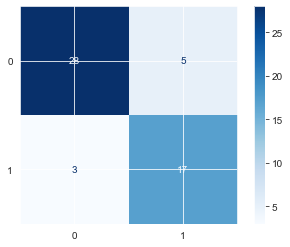

In [75]:
plot_confusion_matrix(clf, X_test, y_test, display_labels=df.target, cmap=plt.cm.Blues)
plt.axis('off')
plt.grid(b=None)

# fig = plt.gcf()
# fig.set_size_inches(11,8)
plt.show()

In [64]:
coefficients = np.hstack((clf.intercept_, clf.coef_[0]))
pd.DataFrame(data={'variable': ['intercept'] + cat_cols + num_cols, 'coefficient': coefficients})

,variable,coefficient
0,intercept,-2.362811
1,cp_4,0.053806
2,cp_3,-0.014187
3,restecg_1.0,0.310962
4,exang,-0.159984
5,fbs,1.051015
6,restecg_2.0,1.617813
7,sex,0.653044
8,cp_2,-0.651773
9,age,0.879011


In [79]:
analyzed_data = pd.DataFrame(data={'variable': num_cols, 'unit': np.sqrt(scale.var_)})
analyzed_data

,variable,unit
0,age,7.794608
1,trestbps,17.682971
2,chol,67.458549
3,thalach,23.563280
4,oldpeak,0.963218


In [82]:
np.exp(analyzed_data.iloc[2, 1])
np.exp(	0.345501)

1.4126975038524505

In [81]:
analyzed_data.iloc[2, 1]

67.45854917698429

For example, holding other variables fixed, there is a 41% increase in the odds of having a heart disease for every standard deviation increase in cholesterol (63.470764) since exp(0.345501) = 1.41.